# 数据准备

## 连续区间

In [6]:
import numpy as np
import pandas as pd
from utils import *
from ngboost.learners import *

输出连续区间

In [2]:
path = '/Users/apple/Documents/ML_Project/ML - 2.1/Data/国际西班牙数据.csv'
data = load_data(path, add_time=True, describe=False)

index = data[data['wind_speed'].isna() |
    data['wind_direction'].isna() |
    data['wind_power'].isna()]['wind_power'].index.tolist()
a = index[0]
b=-1
for i,x in enumerate(index):
    if i<len(index)-1:
        if index[i+1] > index[i]+1:
            print('Continue: [',b+1, ',', a-1,']','len:',a-b-2,
                '\tNan: [',a, ',',index[i], '] len:',index[i]-a+1)     
            a = index[i+1]
            b = index[i]
    else: 
        a=index[-15]
        print('Continue: [',b+1, ',', a-1,']','len:',a-b-2,
                '\tNan: [',a, ',',index[i], '] len:',index[i]-a+1)     
        a=len(data)
        b=index[i]
        print('Continue: [',b+1, ',', a-1,']','len:',a-b-2)

del data

Continue: [ 0 , 975 ] len: 975 	Nan: [ 976 , 976 ] len: 1
Continue: [ 977 , 2216 ] len: 1239 	Nan: [ 2217 , 2221 ] len: 5
Continue: [ 2222 , 3498 ] len: 1276 	Nan: [ 3499 , 3560 ] len: 62
Continue: [ 3561 , 3572 ] len: 11 	Nan: [ 3573 , 3589 ] len: 17
Continue: [ 3590 , 4314 ] len: 724 	Nan: [ 4315 , 4401 ] len: 87
Continue: [ 4402 , 6255 ] len: 1853 	Nan: [ 6256 , 6273 ] len: 18
Continue: [ 6274 , 6375 ] len: 101 	Nan: [ 6376 , 6376 ] len: 1
Continue: [ 6377 , 6417 ] len: 40 	Nan: [ 6418 , 6425 ] len: 8
Continue: [ 6426 , 10427 ] len: 4001 	Nan: [ 10428 , 10447 ] len: 20
Continue: [ 10448 , 13432 ] len: 2984 	Nan: [ 13433 , 13434 ] len: 2
Continue: [ 13435 , 13976 ] len: 541 	Nan: [ 13977 , 13985 ] len: 9
Continue: [ 13986 , 14000 ] len: 14 	Nan: [ 14001 , 14009 ] len: 9
Continue: [ 14010 , 14024 ] len: 14 	Nan: [ 14025 , 14033 ] len: 9
Continue: [ 14034 , 14048 ] len: 14 	Nan: [ 14049 , 14057 ] len: 9
Continue: [ 14058 , 14072 ] len: 14 	Nan: [ 14073 , 14077 ] len: 5
Continue: [ 1407

## 可视化

In [3]:
%config InlineBackend.figure_format='retina'
from tqdm.notebook import tqdm as tqdm
for day in tqdm(np.arange(1,2)):
    plot_module1(year=2017, month=10, day=day, figsize=(8,13), 
                 save_fig=False, close_fig=True)
for day in tqdm(np.arange(1,2)):
    plot_module2(year=2017, month=10, day=day, figsize=(8,10), 
                 save_fig=False, close_fig=True)

# 模型预测

In [2]:
import numpy as np
import pandas as pd
from module.utils import *
from ngboost.learners import *
%config InlineBackend.figure_format='retina'

In [3]:
transform='ws*sin(wd)+ws*cos(wd)'
X_train, X_test, Y_train, Y_test = get_data(hour_num=0, transform=transform,
                                            drop_time=True, scale=True)
Pred_df = Y_test

get_data(hour_num=0, transform='ws*sin(wd)+ws*cos(wd)', drop_time=True, scale=True)



## default_linear_learner

NGBRegressor(Base=Ridge(alpha=0.1, copy_X=True, fit_intercept=True,
                        max_iter=None, normalize=False, random_state=None,
                        solver='auto', tol=0.001),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.MLE'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=100) 

[iter 0] loss=0.0535 val_loss=0.0000 scale=0.2500 norm=0.1352
[iter 100] loss=0.0524 val_loss=0.0000 scale=0.2500 norm=0.1350
[iter 200] loss=0.0524 val_loss=0.0000 scale=0.1250 norm=0.0675
[iter 300] loss=0.0524 val_loss=0.0000 scale=0.0625 norm=0.0338
[iter 400] loss=0.0524 val_loss=0.0000 scale=0.0312 norm=0.0169

Test MSE 0.05932252097751367
Test NLL 0.008632585860007869


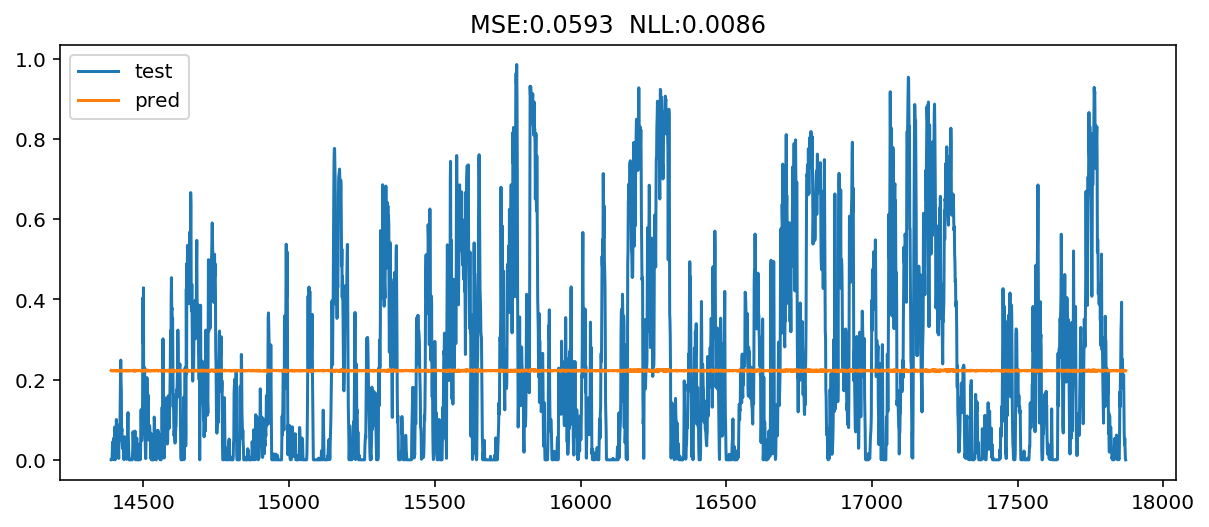

In [4]:
Y_pred = model_test(Base=default_linear_learner(alpha=0.1),
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test,
          n_estimators=500, verbose_eval=100,
          plot_predict=True, return_y_pred=True)
Y_pred.name = 'default_linear_learner'
Pred_df = pd.concat([Pred_df, Y_pred], axis=1)
del Y_pred

## default_tree_learner

NGBRegressor(Base=DecisionTreeRegressor(criterion='friedman_mse', max_depth=6,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=None,
                                        splitter='best'),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.MLE'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=1000, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=200) 

[iter 0] loss=0.0535 val_loss=0.0000 scale=1.0000 norm=0.5407
[iter 200] loss=-0.3170 val_loss=0.0000 scale=0.0625 norm=0.0290
[iter 400] loss=-0.3220 val_loss=0.000

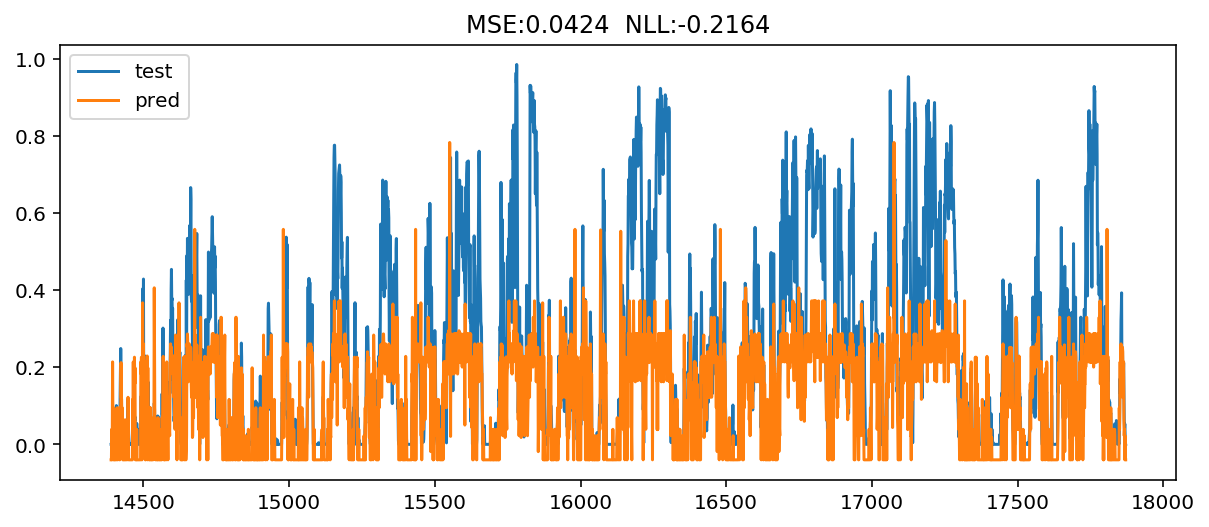

In [5]:
Y_pred = model_test(Base=default_tree_learner(depth=6),
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test,
          n_estimators=1000, verbose_eval=200,
          plot_predict=True, return_y_pred=True)
Y_pred.name = 'default_tree_learner'
Pred_df = pd.concat([Pred_df, Y_pred], axis=1)
del Y_pred

## lasso_learner

NGBRegressor(Base=Lasso(alpha=0.01, copy_X=True, fit_intercept=True,
                        max_iter=1000, normalize=False, positive=False,
                        precompute=False, random_state=None, selection='cyclic',
                        tol=0.0001, warm_start=False),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.CRPS'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=100) 

[iter 0] loss=0.1430 val_loss=0.0000 scale=0.5000 norm=1.2208
[iter 100] loss=0.1415 val_loss=0.0000 scale=0.0625 norm=0.1667
[iter 200] loss=0.1415 val_loss=0.0000 scale=0.0156 norm=0.0428
[iter 300] loss=0.1414 val_loss=0.0000 scale=0.0039 norm=0.0108
[iter 400] loss=0.1414 val_loss=0.0000 scale=0.0010 norm=0.0027

Test MSE 0.06411462031624857
Test NLL 0.04803610477379679


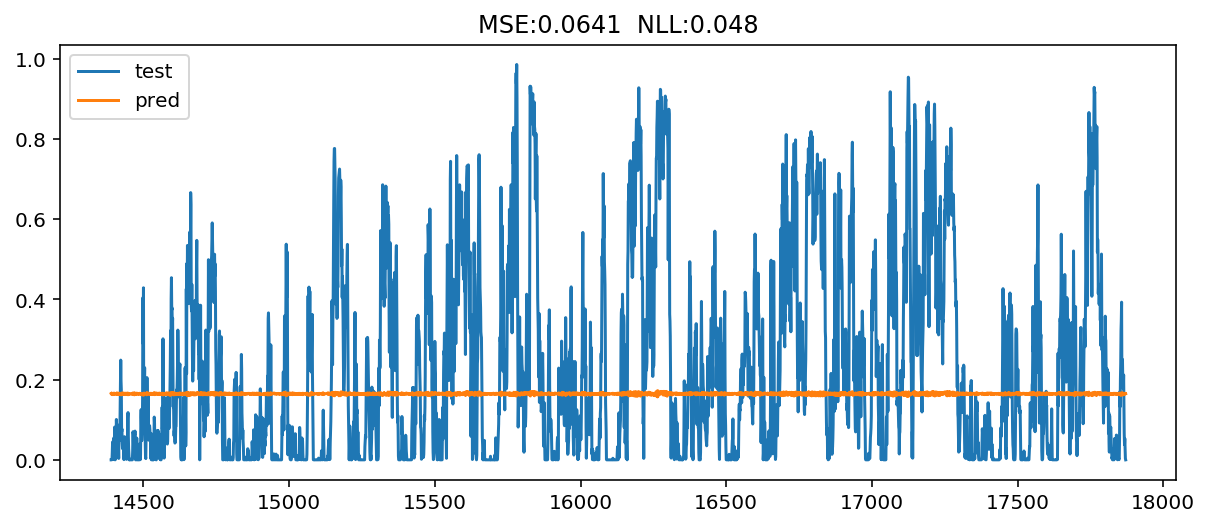

In [6]:
Y_pred = model_test(Base=lasso_learner(alpha=0.01),
           n_estimators=500, verbose_eval=100, Score=CRPS,
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test,
          plot_predict=True, return_y_pred=True)
Y_pred.name = 'lasso_learner'
Pred_df = pd.concat([Pred_df, Y_pred], axis=1)
del Y_pred

## linear_svr_learner

NGBRegressor(Base=LinearSVR(C=0.05, dual=True, epsilon=0.0, fit_intercept=True,
                            intercept_scaling=1.0, loss='epsilon_insensitive',
                            max_iter=1000, random_state=None, tol=0.0001,
                            verbose=0),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.MLE'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=100) 

[iter 0] loss=0.0535 val_loss=0.0000 scale=0.0156 norm=0.0084
[iter 100] loss=0.0534 val_loss=0.0000 scale=0.0039 norm=0.0021
[iter 200] loss=0.0534 val_loss=0.0000 scale=0.0005 norm=0.0003
[iter 300] loss=0.0534 val_loss=0.0000 scale=0.0002 norm=0.0001
[iter 400] loss=0.0534 val_loss=0.0000 scale=0.0002 norm=0.0001

Test MSE 0.05935908366586319
Test NLL 0.008802766800103223


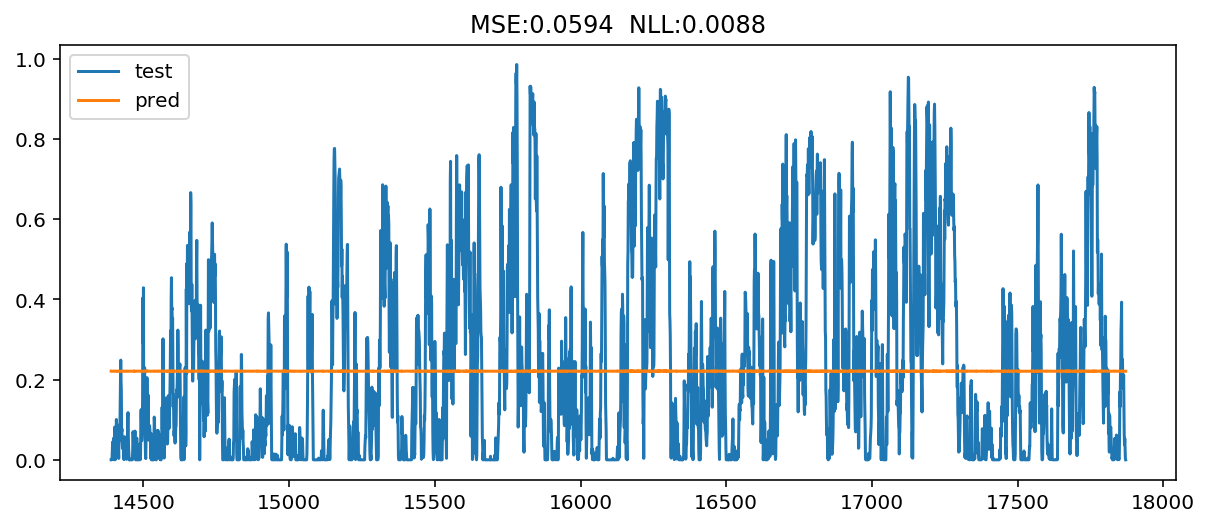

In [7]:
Y_pred = model_test(Base=linear_svr_learner(epsilon=0.0, 
                                   C=0.05, 
                                   max_iter=10000),
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test,
          n_estimators=500, verbose_eval=100,
          plot_predict=True, return_y_pred=True)
Y_pred.name = 'linear_svr_learner'
Pred_df = pd.concat([Pred_df, Y_pred], axis=1)
del Y_pred

## kernel_ridge_learner

In [ ]:
Y_pred = model_test(Base=kernel_ridge_learner(alpha=0.5, 
                                    kernel="poly",
                                    degree=3),
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test,
          n_estimators=500, verbose_eval=10,
          plot_predict=True, return_y_pred=True)
Y_pred.name = 'kernel_ridge_learner'
Pred_df = pd.concat([Pred_df, Y_pred], axis=1)
del Y_pred

NGBRegressor(Base=KernelRidge(alpha=0.5, coef0=1, degree=3, gamma=None,
                              kernel='poly', kernel_params=None),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.MLE'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=10) 

[iter 0] loss=0.0535 val_loss=0.0000 scale=1.0000 norm=0.5407
[iter 10] loss=-0.0685 val_loss=0.0000 scale=1.0000 norm=0.4805


## esn_ridge_learner

In [ ]:
Y_pred = model_test(Base=esn_ridge_learner(n_readout=1000,
                                  n_components=100,
                                  alpha=0.01),
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test,
          n_estimators=500, verbose_eval=10,
          plot_predict=True, return_y_pred=True)
Y_pred.name = 'esn_ridge_learner'
Pred_df = pd.concat([Pred_df, Y_pred], axis=1)
del Y_pred

## esn_kernel_ridge_learner

In [ ]:
Y_pred = model_test(Base=esn_kernel_ridge_learner(n_readout=1000,
                                         n_components=100,
                                         alpha=1, 
                                         kernel='poly',
                                         degree=3),
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test,
          n_estimators=500, verbose_eval=5,
          plot_predict=True, return_y_pred=True)
Y_pred.name = 'esn_kernel_ridge_learner'
Pred_df = pd.concat([Pred_df, Y_pred], axis=1)
del Y_pred

## esn_linear_svr_learner

In [ ]:
Y_pred = model_test(Base=esn_linear_svr_learner(n_readout=1000,
                                         n_components=100,
                                         epsilon=0.0,
                                         C=0.02,
                                         max_iter=1000),
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test,
          n_estimators=500, verbose_eval=10,
          plot_predict=True, return_y_pred=True)
Y_pred.name = 'esn_linear_svr_learner'
Pred_df = pd.concat([Pred_df, Y_pred], axis=1)
del Y_pred

In [ ]:
Pred_df.to_csv('/Users/apple/Documents/ML_Project/ML - 2.1/result/'+transform+'.csv')